## Семинар 13
# Тема: Кластеризация

_Кластеризация_ относится к методам обучения без учителя. 

Задача кластеризации состоит в разбиении множества исходных объектов на подмножества близких по свойствам объектов. Понятие _близости_ формализуется при помощи задания _метрики_, или расстояния между объектами $\rho\left(x_i,x_j\right)$. 

### Метод k-means.
Познакомимся с одним из наиболее известных алгоритмов кластеризации: _k-means_ или _k средних_. 

Алгоритм метода выглядит следующим образом:

1. Случайным образом выбираются k точек $x_k \in X$, в дальнейшем будем называть их центрами кластеров (центроидами);

2. Для каждой точки $x_i \in X$ вычисляется $\rho\left(x_i,x_k\right)$, после чего ей ставится в соответствие  ближайший к ней центр кластера. Совокупность точек, отнесённых к центру $x_k$ называется кластером;

3. Вычисляются средние взвешенные точек (центры масс), принадлежащих к определённому кластеру. Эти значения становятся новыми центрами кластеров;

4. Шаги 2 и 3 повторяются до тех пор, пока пересчёт центров кластеров будет существенно менять местоположение кластеров. Как только высчитанные центры кластеров совпадут с предыдущими, алгоритм будет окончен.

Следует иметь в виду, что этот алгоритм хорошо работает только для нормальных выборок, причем кластеры не должны существенно перекрываться.

Недостатком алгоритма является то, что число кластеров в нем - гиперпараметр, т.е. должно быть задано изначально.


### Метод DBSCAN.

Познакомиться с методом машинного обучения DBSCAN, осуществляющим группировку наблюдений в кластеры высокой плотности.

DBSCAN имеет три основных устанавливаемых параметра:

♦ eps — максимальное расстояние от наблюдения, чтобы считать другое наблюдение его соседом;

♦ min sampies — минимальное число наблюдений, находящихся на расстоянии менее eps от наблюдения, для того чтобы его можно было считать ключевым наблюдением;

♦ metric— метрический показатель расстояния, используемый параметром eps, 
например minkowski или euclidean (обратите внимание, что если используется
расстояние Минковского, то может быть использован параметр р для установки
мощности метрического показателя Минковского).

Наблюдения подразделяются на три типа точек:

1. Центральная точка (точка данных является центральной, если круг радиуса eps вокруг нее содержит не менее min_sampies точек)

2. Граничная точка (количество точек меньше min_sampies, но есть хотя бы одна центральная)

3. Шум (нет ни одной центральной точки в круге радиуса eps вокруг нее)

Алгоритм хорошо работает с кластерами произвольной формы, число кластеров определяется в ходе работы алгоритма, а не задаётся, как гиперпараметр. Хуже работает на данных с разной плотностью.

Silhouette Score — это метрика для оценки качества результатов кластеризации. Она измеряет, насколько точка данных похожа на собственный кластер по сравнению с другими кластерами. Оценка варьируется от –1 до 1, где более высокое значение указывает на лучшую производительность кластеризации. Значение, близкое к 1, предполагает, что точки данных хорошо кластеризованы и правильно разделены, а значение, близкое к -1, указывает на то, что точки данных могли быть отнесены к неправильным кластерам. В коде Silhouette Score рассчитывается с помощью функции silhouette_score().

Загрузим необходимые библиотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import datasets

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Метод k-means.

### 1. Сформируйте данные при помощи make_blobs(n_samples=1000, centers=5, random_state=10). Выведите полученные данные в виде датафрейма, дав названия колонкам X1 и  X2. Визуализируйте их при помощи диаграммы рассеяния.

In [2]:
X, y = make_blobs(n_samples=1000, centers=5, random_state=10)

df = pd.DataFrame(X, columns=['X1', 'X2'])

In [3]:
df.head()

,X1,X2
0,4.401660,-9.424562
1,-6.706999,-8.433564
2,-6.253321,5.015825
3,7.411799,-8.137795
4,-4.839208,5.689303


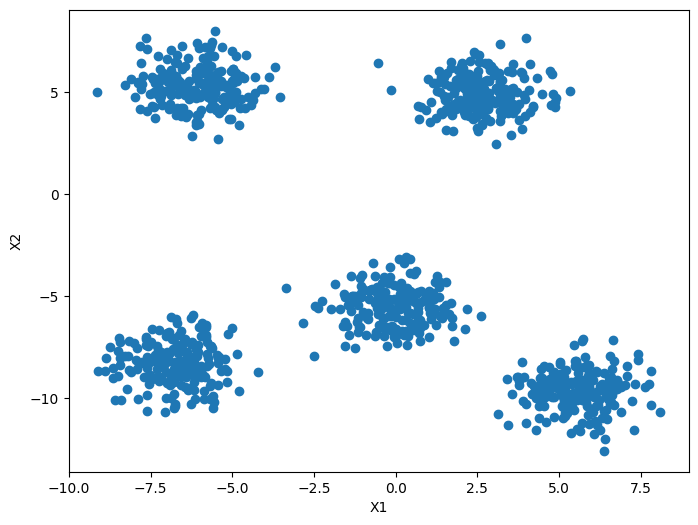

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(df['X1'], df['X2'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### 2. Масштабируйте данные при помощи MinMaxScaler.

In [5]:
scaler = MinMaxScaler()

scaler.fit(df)

MinMaxScaler()

In [6]:
scaled_data = scaler.transform(df)

df_scaled = pd.DataFrame(scaled_data, columns=['X1', 'X2'])

In [7]:
df_scaled.head()

,X1,X2
0,0.785333,0.152662
1,0.141640,0.200842
2,0.167929,0.854730
3,0.959756,0.215222
4,0.249870,0.887474


### 3. Создайте экземпляр класса k-средних с пятью кластерами, зафиксировав random_state = 42. Обучите эту модель на масштабированных данных. Выведите метки кластеров при помощи атрибута .labels_ и при помощи метода .predict(). Убедитесь, что результат будет одинаковый.

In [8]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_scaled)

KMeans(n_clusters=5, random_state=42)

In [9]:
kmeans.labels_

array([2, 0, 3, 2, 3, 4, 4, 4, 2, 0, 4, 2, 0, 1, 0, 4, 0, 0, 2, 4, 1, 4,
       4, 3, 0, 0, 3, 0, 2, 1, 2, 2, 3, 1, 2, 2, 0, 0, 0, 0, 0, 4, 4, 3,
       4, 3, 1, 0, 3, 3, 2, 3, 2, 3, 4, 2, 0, 0, 2, 3, 1, 4, 4, 0, 0, 3,
       2, 3, 1, 3, 2, 1, 4, 0, 1, 1, 4, 3, 0, 3, 2, 2, 2, 2, 3, 3, 3, 4,
       1, 0, 0, 4, 2, 2, 2, 0, 2, 2, 1, 2, 0, 2, 0, 2, 1, 3, 0, 3, 4, 2,
       1, 3, 3, 3, 4, 3, 3, 3, 4, 2, 1, 4, 4, 4, 0, 0, 3, 1, 2, 3, 4, 3,
       3, 4, 1, 1, 0, 4, 0, 1, 3, 3, 3, 0, 1, 0, 3, 2, 1, 1, 3, 0, 3, 0,
       0, 3, 4, 3, 4, 4, 1, 0, 4, 4, 1, 4, 2, 3, 4, 0, 4, 0, 0, 2, 1, 4,
       3, 0, 0, 2, 4, 3, 3, 2, 2, 4, 0, 2, 3, 0, 4, 0, 0, 4, 0, 4, 0, 4,
       2, 2, 4, 2, 0, 3, 1, 0, 4, 2, 3, 0, 2, 2, 4, 4, 3, 3, 3, 3, 1, 4,
       3, 0, 2, 2, 4, 1, 3, 4, 3, 2, 2, 3, 1, 4, 3, 2, 0, 4, 2, 1, 0, 2,
       0, 4, 2, 4, 1, 0, 0, 4, 1, 4, 2, 1, 0, 3, 4, 2, 0, 3, 4, 0, 1, 1,
       1, 1, 3, 0, 2, 4, 2, 3, 2, 2, 0, 3, 2, 2, 2, 1, 1, 3, 1, 2, 1, 1,
       4, 3, 1, 1, 2, 1, 3, 3, 3, 3, 3, 1, 3, 3, 2,

In [10]:
kmeans.predict(df_scaled)

array([2, 0, 3, 2, 3, 4, 4, 4, 2, 0, 4, 2, 0, 1, 0, 4, 0, 0, 2, 4, 1, 4,
       4, 3, 0, 0, 3, 0, 2, 1, 2, 2, 3, 1, 2, 2, 0, 0, 0, 0, 0, 4, 4, 3,
       4, 3, 1, 0, 3, 3, 2, 3, 2, 3, 4, 2, 0, 0, 2, 3, 1, 4, 4, 0, 0, 3,
       2, 3, 1, 3, 2, 1, 4, 0, 1, 1, 4, 3, 0, 3, 2, 2, 2, 2, 3, 3, 3, 4,
       1, 0, 0, 4, 2, 2, 2, 0, 2, 2, 1, 2, 0, 2, 0, 2, 1, 3, 0, 3, 4, 2,
       1, 3, 3, 3, 4, 3, 3, 3, 4, 2, 1, 4, 4, 4, 0, 0, 3, 1, 2, 3, 4, 3,
       3, 4, 1, 1, 0, 4, 0, 1, 3, 3, 3, 0, 1, 0, 3, 2, 1, 1, 3, 0, 3, 0,
       0, 3, 4, 3, 4, 4, 1, 0, 4, 4, 1, 4, 2, 3, 4, 0, 4, 0, 0, 2, 1, 4,
       3, 0, 0, 2, 4, 3, 3, 2, 2, 4, 0, 2, 3, 0, 4, 0, 0, 4, 0, 4, 0, 4,
       2, 2, 4, 2, 0, 3, 1, 0, 4, 2, 3, 0, 2, 2, 4, 4, 3, 3, 3, 3, 1, 4,
       3, 0, 2, 2, 4, 1, 3, 4, 3, 2, 2, 3, 1, 4, 3, 2, 0, 4, 2, 1, 0, 2,
       0, 4, 2, 4, 1, 0, 0, 4, 1, 4, 2, 1, 0, 3, 4, 2, 0, 3, 4, 0, 1, 1,
       1, 1, 3, 0, 2, 4, 2, 3, 2, 2, 0, 3, 2, 2, 2, 1, 1, 3, 1, 2, 1, 1,
       4, 3, 1, 1, 2, 1, 3, 3, 3, 3, 3, 1, 3, 3, 2,

In [11]:
all(kmeans.labels_ == kmeans.predict(df_scaled))

True

### 4. Выведите центры кластеров с помощью атрибута .cluster_centers_. Ремасштабируйте центры кластеров при помощи метода .inverse_transform().

In [12]:
cluster_centers_scaled = kmeans.cluster_centers_

In [13]:
cluster_centers_scaled

array([[0.14003281, 0.20773946],
       [0.68325617, 0.85205688],
       [0.8520994 , 0.1432125 ],
       [0.17895293, 0.86742103],
       [0.52600287, 0.34328769]])

In [14]:
cluster_centers = scaler.inverse_transform(cluster_centers_scaled)

In [15]:
cluster_centers

array([[-6.73474199, -8.29170239],
       [ 2.64004968,  4.96083603],
       [ 5.55389732, -9.61891479],
       [-6.06306977,  5.27685104],
       [-0.07378228, -5.50370058]])

### 5. Визуализируйте полученные кластеры, подкрасив их разными цветами. Также на этом рисунке укажите центры кластеров, пометив их красными ромбами.

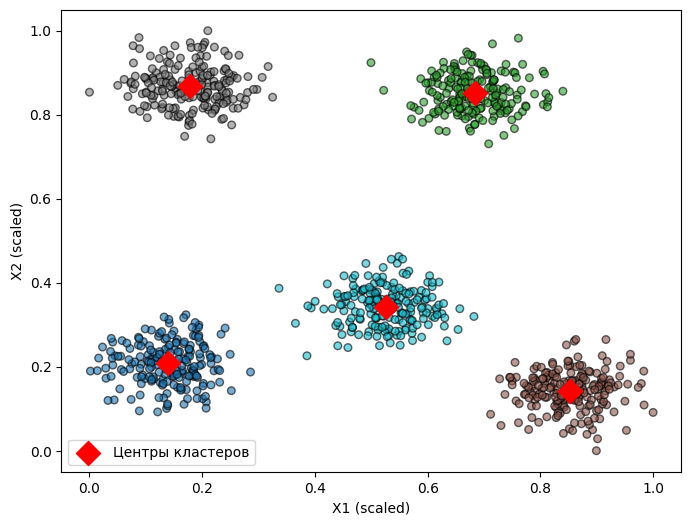

In [16]:
plt.figure(figsize=(8, 6))

plt.scatter(df_scaled['X1'], df_scaled['X2'], c=kmeans.labels_, cmap='tab10', s=30, alpha=0.6, edgecolor='k')

plt.scatter(
    cluster_centers_scaled[:, 0], cluster_centers_scaled[:, 1],
    c='red', marker='D', s=150, label='Центры кластеров'
)

plt.xlabel('X1 (scaled)')
plt.ylabel('X2 (scaled)')
plt.legend()
plt.show()

### 6. Выведите сумму квадратов расстояний образцов до ближайшего центра кластера при помощи атрибута .inertia_

In [17]:
kmeans.inertia_

5.329461618751004

### 7. Осуществите проверку правильности выбора гиперпараметра модели k-средних "количество кластеров" (n_clusters=5) методом локтя. Для этого постройте график зависимости количества кластеров от значения inertia_. Правильное количество кластеров будет тo, где построенная кривая имеет наиболее сильный излом ("локоть"), то есть то, после которого значение inertia_ перестаёт существенно снижаться.

In [18]:
inertias = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

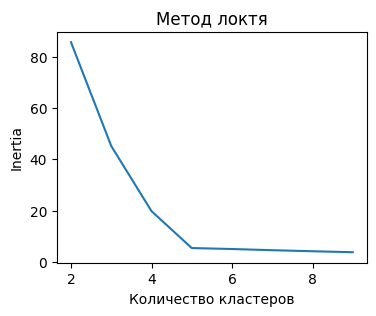

In [19]:
plt.figure(figsize=(4, 3))
plt.plot(range(2, 10), inertias)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')
plt.show()

### 8. Оцените качество кластеризации при помощи метрики Silhouette Score.

In [20]:
silhouette_score(X, kmeans.labels_)

np.float64(0.39574336063263715)

# Метод DBSCAN.

### 1. Загрузите встроенный датасет iris. В качестве рассматриваемых данных, возьмите второй и третий столбцы датасета. Выведите данные в виде датафрейма c названиями колонок. 

In [21]:
iris = datasets.load_iris()
X = iris.data[:, 1:3]

df = pd.DataFrame(X, columns=iris.feature_names[1:3])

df.head()

,sepal width (cm),petal length (cm)
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4


### 2. Визуализируйте данные на диаграмме рассеяния.

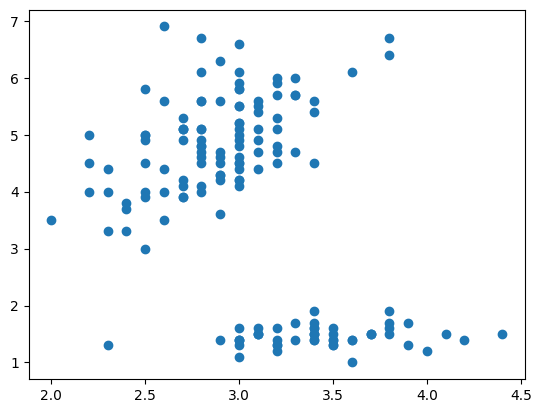

In [22]:
plt.scatter(df["sepal width (cm)"], df["petal length (cm)"])
plt.show()

### 3. Стандартизируйте данные при помощи StandardScaler.

In [23]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [24]:
df_scaled = pd.DataFrame(X_scaled, columns=iris.feature_names[1:3])

df_scaled.head()

,sepal width (cm),petal length (cm)
0,1.019004,-1.340227
1,-0.131979,-1.340227
2,0.328414,-1.397064
3,0.098217,-1.283389
4,1.249201,-1.340227


### 4. Создайте класс DBSCAN(eps=0.65, min_samples=8,n_jobs=-1). Обучите на стандартизированных данных. Выведите метки кластеров при помощи атрибута .labels_.

In [25]:
dbscan = DBSCAN(eps=0.65, min_samples=8,n_jobs=-1)
dbscan.fit(df_scaled)

DBSCAN(eps=0.65, min_samples=8, n_jobs=-1)

In [26]:
labels = dbscan.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

### 5. Выведите получившееся в результате работы алгоритма, количество кластеров.

In [27]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters

2

### 6. Выведите количество наблюдений, отнесённых к шумам. Для шумов метка кластеров равна -1.

In [28]:
n_noise = list(labels).count(-1)
n_noise

4

### 7. Визуализируйте полученные кластеры и шумы, подкрасив их разными цветами. 

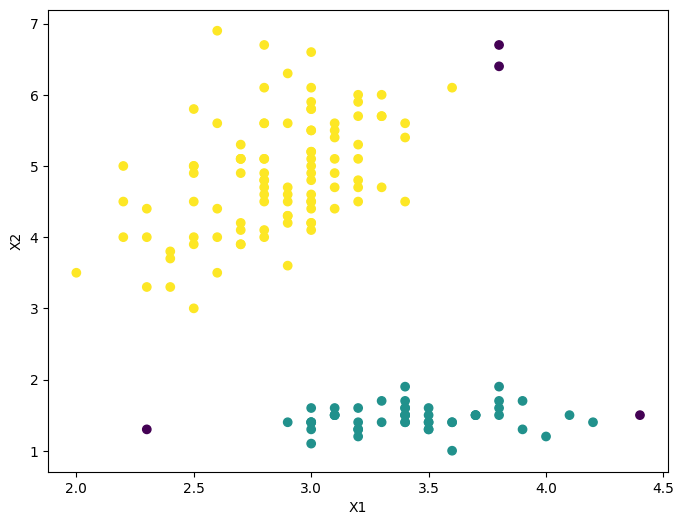

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(df["sepal width (cm)"], df["petal length (cm)"], c=dbscan.labels_)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### 8. Оцените качество кластеризации при помощи метрики Silhouette Score.

In [30]:
silhouette_score(X, dbscan.labels_)

np.float64(0.6639710599136929)

### Задания самостоятельного для выполнения:

### Метод k-means.
1. Загрузите прилагающийся датасет Mall_Customers.csv.
2. Оставьте в нём только два столбца Annual Income и Spending Score.
3. Масштабируйте данные при помощи StandardScaler.
4. Визуализируйте данные при помощи диаграммы рассеяния и сделайте предположение о количестве кластеров. 
5. Определите наилучшее число кластеров с помощью метода локтя.
6. Обучите модель k-средних с лучшим числом кластеров и предскажите метки кластеров для каждого значения из датасета.
7. Визуализируйте полученные кластеры разными цветами с изображением центров кластеров.
8. Оцените эффективность кластеризации с помощью метрики Silhouette Score.

1. Загрузите прилагающийся датасет Mall_Customers.csv.

In [47]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


2. Оставьте в нём только два столбца Annual Income и Spending Score.

In [49]:
df = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

3. Масштабируйте данные при помощи StandardScaler.

In [50]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(df)

In [51]:
df_scaled = pd.DataFrame(X_scaled, columns=df.columns)
df_scaled.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


4. Визуализируйте данные при помощи диаграммы рассеяния и сделайте предположение о количестве кластеров.

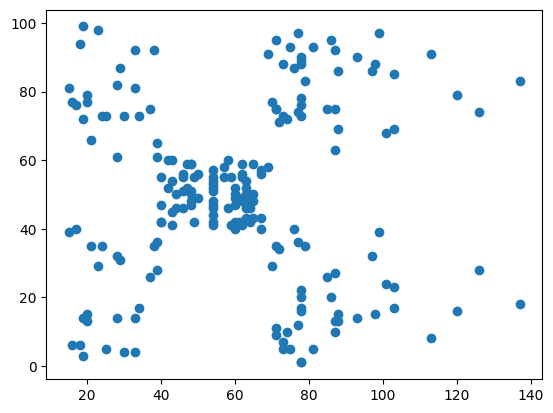

In [52]:
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"])
plt.show()

5. Определите наилучшее число кластеров с помощью метода локтя.

In [53]:
inertias = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

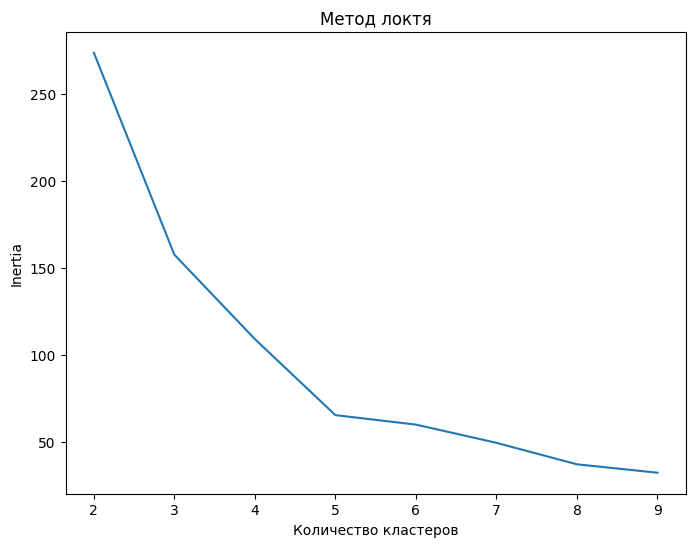

In [56]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), inertias)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')
plt.show()

6. Обучите модель k-средних с лучшим числом кластеров и предскажите метки кластеров для каждого значения из датасета.

In [57]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_scaled)

KMeans(n_clusters=5, random_state=42)

In [66]:
labels = kmeans.predict(df_scaled)
labels

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

7. Визуализируйте полученные кластеры разными цветами с изображением центров кластеров.

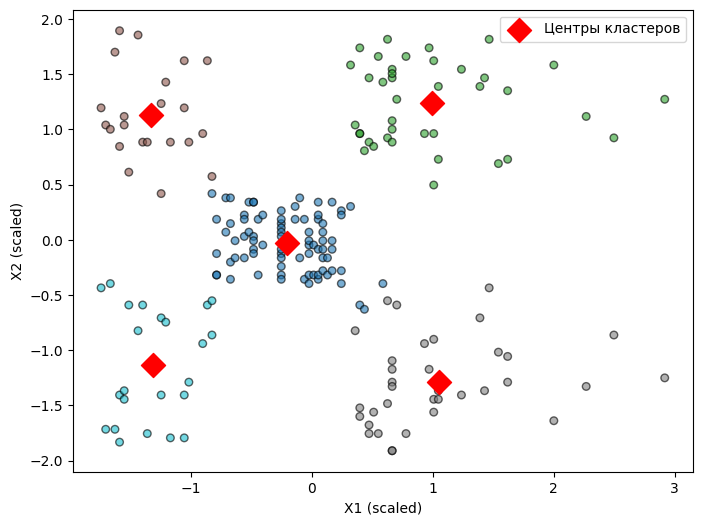

In [60]:
plt.figure(figsize=(8, 6))

plt.scatter(
    df_scaled['Annual Income (k$)'],
    df_scaled['Spending Score (1-100)'],
    c=kmeans.labels_,
    cmap='tab10',
    s=30,
    alpha=0.6,
    edgecolor='k'
)

cluster_centers_scaled = kmeans.cluster_centers_
plt.scatter(
    cluster_centers_scaled[:, 0], cluster_centers_scaled[:, 1],
    c='red', marker='D', s=150, label='Центры кластеров'
)

plt.xlabel('X1 (scaled)')
plt.ylabel('X2 (scaled)')
plt.legend()
plt.show()

8. Оцените эффективность кластеризации с помощью метрики Silhouette Score.

In [65]:
silhouette_score(df, kmeans.labels_)

np.float64(0.553931997444648)

### Метод DBSCAN.
1. Загрузите встроенный датасет iris. Выведите данные в виде датафрейма c названиями колонок. 
2. Стандартизируйте данные при помощи StandardScaler.
3. Создайте класс DBSCAN(n_jobs=-1). Обучите на стандартизированных данных. Выведите метки кластеров при помощи атрибута .labels_.
4. Выведите получившееся в результате работы алгоритма, количество кластеров.
5. Выведите количество наблюдений, отнесённых к шумам. 
6. Оцените качество кластеризации при помощи метрики Silhouette Score.
7. Создайте класс DBSCAN(eps=0.65, min_samples=8,n_jobs=-1). Обучите на стандартизированных данных. Выведите метки кластеров при помощи атрибута .labels_. Оцените качество кластеризации при помощи метрики Silhouette Score и сделайте вывод о том, улучшилась ли работа алгоритма при изменении гиперпараметров модели. 
8. Повторите задание 7, используя Pipeline.

1. Загрузите встроенный датасет iris. Выведите данные в виде датафрейма c названиями колонок. 

In [31]:
iris = datasets.load_iris()
X = iris.data

df = pd.DataFrame(X, columns=iris.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


2. Стандартизируйте данные при помощи StandardScaler.

In [32]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(df)

In [33]:
df_scaled = pd.DataFrame(X_scaled, columns=iris.feature_names)
df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


3. Создайте класс DBSCAN(n_jobs=-1). Обучите на стандартизированных данных. Выведите метки кластеров при помощи атрибута .labels_.

In [34]:
dbscan = DBSCAN(n_jobs=-1)
dbscan.fit(df_scaled)

DBSCAN(n_jobs=-1)

In [35]:
labels = dbscan.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1])

4. Выведите получившееся в результате работы алгоритма, количество кластеров.

In [36]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters

2

5. Выведите количество наблюдений, отнесённых к шумам.

In [37]:
n_noise = list(labels).count(-1)
n_noise

34

6. Оцените качество кластеризации при помощи метрики Silhouette Score.

In [38]:
silhouette_score(X_scaled, dbscan.labels_)

np.float64(0.35651648142700726)

7. Создайте класс DBSCAN(eps=0.65, min_samples=8,n_jobs=-1). Обучите на стандартизированных данных. Выведите метки кластеров при помощи атрибута .labels_. Оцените качество кластеризации при помощи метрики Silhouette Score и сделайте вывод о том, улучшилась ли работа алгоритма при изменении гиперпараметров модели. 

In [39]:
dbscan1 = DBSCAN(eps=0.65, min_samples=8,n_jobs=-1)

dbscan1.fit(df_scaled)

DBSCAN(eps=0.65, min_samples=8, n_jobs=-1)

In [40]:
labels1 = dbscan1.labels_
labels1

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,
       -1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [41]:
silhouette_score(X_scaled, dbscan1.labels_)

np.float64(0.3811821859841164)

8. Повторите задание 7, используя Pipeline.

In [42]:
from sklearn.pipeline import Pipeline

In [43]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dbscan', DBSCAN(eps=0.65, min_samples=8, n_jobs=-1))
])

In [44]:
pipeline.fit(X)

Pipeline(steps=[('scaler', StandardScaler()),
                ('dbscan', DBSCAN(eps=0.65, min_samples=8, n_jobs=-1))])

In [45]:
labels_pipe = pipeline.named_steps['dbscan'].labels_
labels_pipe

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,
       -1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [46]:
X_scaled_pipe = pipeline.named_steps['scaler'].transform(X)

silhouette_score(X_scaled_pipe, dbscan1.labels_)

np.float64(0.3811821859841164)